# StyleGAN2-ADA: hi-res generative modeling

## [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ml4a/ml4a-guides/blob/ml4a.net/examples/models/stylegan2_ada.ipynb)

StyleGAN2-ADA is a generative model architecture which generates state-of-the-art, high-resolution images. It is the most recent in [the StyleGAN series](https://nvlabs.github.io/stylegan2/versions.html), and supports training on limited data. This module is based on the [original code](https://github.com/NVlabs/stylegan2-ada-pytorch) and [paper](https://arxiv.org/abs/1912.04958) by NVIDIA, and comes with several pre-trained models, as well as functions for sampling from the GAN, generating interpolations, and performing operations on the latent space to achieve style-transfer like effects.

## Set up ml4a and enable GPU

If you don't already have ml4a installed, or you are opening this in Colab, first enable GPU (`Runtime` > `Change runtime type`), then run the following cell to install ml4a and its dependencies.

In [ ]:
%tensorflow_version 1.x
!pip3 install --quiet ml4a

## Load stylegan 

You can see what pre-trained models are available with `stylegan.get_pretrained_models`.

In [13]:
from ml4a import image
from ml4a.models import stylegan

stylegan.get_pretrained_models()

dict_keys(['afhqcat', 'afhqdog', 'afhqwild', 'brecahad', 'cifar10', 'ffhq', 'metfaces'])

The variable `network_pkl` refers to the location of the trained pkl file. You can load your own pkl locally from your computer, or get one of the pretrained models listed above.

In [14]:
network_pkl = stylegan.get_pretrained_model('ffhq')
stylegan.load_model(network_pkl)

## Generate random samples

`stylegan.random_sample(n)` will generate `n` random images from the latent space of your trained model. If your model is conditional, you must also supply a label vector.

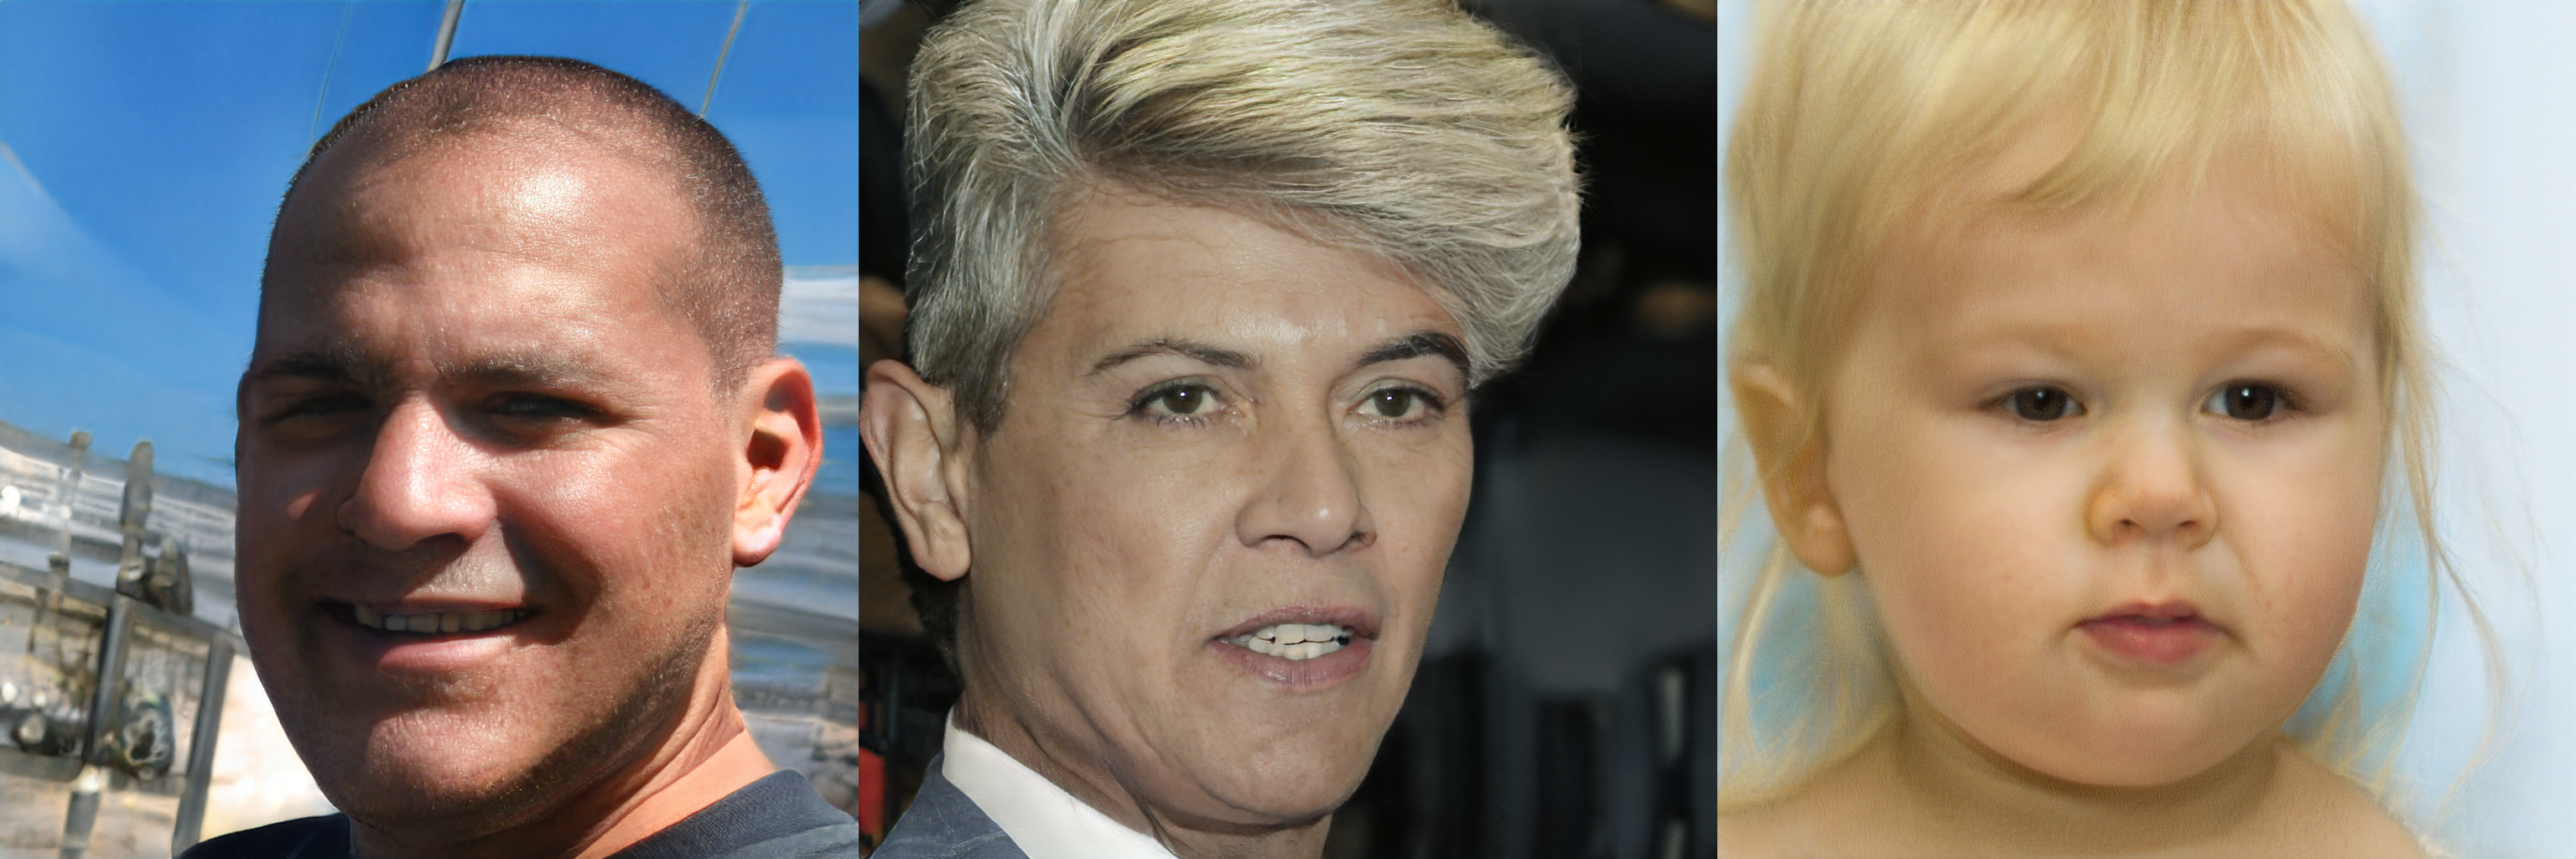

In [18]:
samples = stylegan.random_sample(3, label=None, truncation=1.0)
image.display(samples)

You can quickly generate a "latent walk" video, a random interpolation through the latent space of your model of `duration_sec` seconds long, with `stylegan.generate_interpolation_video`.

In [16]:
latent_video = stylegan.generate_interpolation_video(
    'latent_interpolation.mp4', 
    labels=None,
    truncation=1.0, 
    duration_sec=10.0,
    smoothing_sec=1.0,
    minibatch_size=16
)

100%|██████████| 19/19 [00:19<00:00,  1.01s/it]


Display the generated video inline in the notebook.

In [17]:
image.display_local(latent_video)